In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

In [3]:
# Creación de objeto pandas datafr-ame
patients_df=pd.read_csv('https://github.com/stedy/Machine-Learning-with-R-datasets/blob/master/insurance.csv?raw=true')
patients_df.to_csv("./data.csv")

In [4]:
# Creación variables binarias
patients_df.replace({'sex':{'male':0,'female':1}}, inplace=True)
patients_df.replace({'smoker':{'yes':1,'no':0}}, inplace=True)

In [5]:
# La función get dummies convierte un DataFrame de columnas categoricas a uno con variables dummy variables
region_dummies_df=pd.get_dummies(patients_df[['region']])
region_dummies_df = region_dummies_df.replace().astype(int)
region_dummies_df

,region_northeast,region_northwest,region_southeast,region_southwest
0,0,0,0,1
1,0,0,1,0
2,0,0,1,0
3,0,1,0,0
4,0,1,0,0
...,...,...,...,...
1333,0,1,0,0
1334,1,0,0,0
1335,0,0,1,0
1336,0,0,0,1


In [6]:
# Hacemos join entre los 2 dataframes para reconstruir el dataset
patients_df = patients_df.join(region_dummies_df)

In [7]:
patients_df = patients_df.drop(['region'], axis=1)
patients_df

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,1,27.900,0,1,16884.92400,0,0,0,1
1,18,0,33.770,1,0,1725.55230,0,0,1,0
2,28,0,33.000,3,0,4449.46200,0,0,1,0
3,33,0,22.705,0,0,21984.47061,0,1,0,0
4,32,0,28.880,0,0,3866.85520,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,10600.54830,0,1,0,0
1334,18,1,31.920,0,0,2205.98080,1,0,0,0
1335,18,1,36.850,0,0,1629.83350,0,0,1,0
1336,21,1,25.800,0,0,2007.94500,0,0,0,1


In [14]:
# Uso 70% para entrenamiento (random split)
train_df= patients_df.sample(frac=0.7,random_state=200)
rest_df = patients_df.drop(train_df.index)
# Uso 15% para validacion y 15% para test
val_df=rest_df.sample(frac=0.5,random_state=200)
test_df=rest_df.drop(val_df.index)

In [38]:

def polynomial_features(X, degree):
    from itertools import combinations_with_replacement
    n_samples, n_features = X.shape
    combs = [combinations_with_replacement(range(n_features), i) for i in range(0, degree + 1)]
    combs = [item for sublist in combs for item in sublist]
    n_output_features = len(combs)
    X_new = np.empty((n_samples, n_output_features))
    for i, index_combs in enumerate(combs):
        X_new[:, i] = np.prod(X[:, index_combs], axis=1)
    return X_new

def mean_squared_error(Y_true, Y_pred):
  '''

  '''

  mse = np.sum(np.square(Y_true-Y_pred))/len(Y_true)
  return mse
def root_mean_squared_error(Y_true, Y_pred):

  return np.sqrt(mean_squared_error(Y_true, Y_pred))

class linear_regressor():
    '''
        Clase que implementa el algoritmo de regression logistica con opción de añadir terminos polinomicos
    '''
    def __init__(self, degree=1):

        self.theta = None
        self.degree = degree


    def fit_model(self, X, Y, lr=0.00001, epochs=100, patience=10, l2=None, verbose=False):
        X = polynomial_features(X, self.degree)
        self.l2 = l2
        n, m = X.shape
        self.theta = np.random.rand(m+1,1)
        X_c = np.hstack((np.ones((n,1)),X))
        loss_v = []
        best_loss = np.inf
        epochs_stall = 0

        for epoch in range(epochs):
            Y_est = X_c.dot(self.theta)

            # Calcular la funcion de perdida con regularizacion l2 o sin
            loss = np.sum(np.power(Y_est-Y,2))/(2.*n) + (self.l2 * np.sum(np.square(self.theta)) / 2*m if self.l2 else 0)
            loss_v.append(loss)

            # Calcular gradientes con regularizacion l2 o sin
            regularization_term = (self.l2/m) * self.theta if self.l2 else 0
            gradientes = (-1/n) * (X_c.T.dot((Y - Y_est))) + regularization_term

            # Update weights
            self.theta = self.theta - lr*gradientes

            # Esto se agrega para parar el entrenamiento en caso de que la perdida no disminuya por mas del valor del parametro patience
            if loss < best_loss:
                best_loss = loss
                best_theta = np.copy(self.theta)
                epochs_stall = 0
            else:
                epochs_stall += 1

            if epochs_stall >= patience:
                print('La funcion de perdida no ha disminuido, parando despues de {} epocas. el error es: {:.4e}'.format(epoch, loss))
                break
            if verbose:
              print('Epoch: {} Loss: {:.4e}'.format(epoch, loss))

        print('La perdida en entrenamiento fue: {:.4e}'.format(loss))
        self.theta = best_theta
        self.loss_vector = loss_v

    def predict(self, X):
        X = polynomial_features(X, self.degree)
        X_c = np.hstack((np.ones((X.shape[0],1)),X))
        Y_hat = X_c.dot(self.theta)
        return Y_hat

Prueba de

## Analisis de variables

### Multicolinealidad
Como se puede observar no existen variables altamente correlacionadas por lo tanto se decide utilizar todas las variables

In [19]:
correlation_matrix = np.corrcoef(X, rowvar=False)

# Crear un DataFrame con la matriz de correlación y las etiquetas de las columnas
correlation_df = pd.DataFrame(correlation_matrix, columns=patients_df.drop(columns=['charges']).columns,
                              index=patients_df.drop(columns=['charges']).columns)

correlation_df

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
age,1.000000,0.027422,0.084431,0.060771,-0.051829,-0.010371,0.014073,-0.027887,0.024913
sex,0.027422,1.000000,-0.045460,-0.020528,-0.067844,0.019966,0.030021,-0.019838,-0.028997
bmi,0.084431,-0.045460,1.000000,0.029462,-0.001460,-0.134960,-0.162882,0.283670,0.003014
children,0.060771,-0.020528,0.029462,1.000000,-0.000314,-0.053117,0.034247,0.000312,0.018171
smoker,-0.051829,-0.067844,-0.001460,-0.000314,1.000000,0.045509,-0.049364,0.067197,-0.064973
region_northeast,-0.010371,0.019966,-0.134960,-0.053117,0.045509,1.000000,-0.316008,-0.340888,-0.323377
region_northwest,0.014073,0.030021,-0.162882,0.034247,-0.049364,-0.316008,1.000000,-0.342887,-0.325274
region_southeast,-0.027887,-0.019838,0.283670,0.000312,0.067197,-0.340888,-0.342887,1.000000,-0.350883
region_southwest,0.024913,-0.028997,0.003014,0.018171,-0.064973,-0.323377,-0.325274,-0.350883,1.000000


### Transformaciones

In [ ]:
def log_transform(data):
    return np.log1p(data)

Y_log = log_transform(Y)

In [20]:
# Estandarización de características
def standardize(data):
    mean = np.mean(data, axis=0)
    std = np.std(data, axis=0)
    return (data - mean) / std, mean, std


X_standardized, mean_X, std_X = standardize(X)
Y_standardized, mean_Y, std_Y = standardize(Y)

model = linear_regressor()
model.fit_model(X_standardized, Y, lr=0.01, epochs=100)


El error final fue: 2.6985e+07


In [43]:
# Función para evaluar diferentes hiperparámetros en el conjunto de validación con RMSE
def evaluate_hyperparameters(train_df, val_df, learning_rates, degrees, regularizations):
    best_val_loss = float('inf')
    best_hyperparameters = None

    X_train = train_df.drop(columns=['charges']).values
    Y_train = train_df[['charges']].values
    X_val = val_df.drop(columns=['charges']).values
    Y_val = val_df[['charges']].values

    X_train, _, _ = standardize(X_train)
    X_val, _, _ = standardize(X_val)

    for lr in learning_rates:
        for degree in degrees:
            for reg in regularizations:
                model = linear_regressor(degree=degree)
                print("Entrenando con los hiperparámetros: \nLearning Rate: {}\nGrado Polinomio: {} \nLambda: {}".format(lr, degree, reg))
                model.fit_model(X_train, Y_train, lr=lr, epochs=6000, l2=reg)
                predictions = model.predict(X_val)
                val_rmse = root_mean_squared_error(Y_val, predictions)
                if val_rmse < best_val_loss:
                    best_val_loss = val_rmse
                    best_hyperparameters = (lr, degree, reg)

    return best_hyperparameters, best_val_loss

# Especificar rangos para hiperparámetros
learning_rates = [0.00001, 0.001, 0.01, 0.1, ]
degrees = [1, 2, 3,4]
regularizations = [None, 0.1, 0.01]

best_hyperparameters, best_val_loss = evaluate_hyperparameters(train_df, val_df, learning_rates, degrees, regularizations)

print("Mejores hiperparámetros:", best_hyperparameters)
print("Pérdida de validación con los mejores hiperparámetros: {:.4}".format(best_val_loss))

Entrenando con los hiperparámetros: 
Learning Rate: 1e-05
Grado Polinomio: 1 
Lambda: None
La perdida en entrenamiento fue: 1.3539e+08
Entrenando con los hiperparámetros: 
Learning Rate: 1e-05
Grado Polinomio: 1 
Lambda: 0.1
La perdida en entrenamiento fue: 1.3616e+08
Entrenando con los hiperparámetros: 
Learning Rate: 1e-05
Grado Polinomio: 1 
Lambda: 0.01
La perdida en entrenamiento fue: 1.3548e+08
Entrenando con los hiperparámetros: 
Learning Rate: 1e-05
Grado Polinomio: 2 
Lambda: None
La perdida en entrenamiento fue: 6.9849e+07
Entrenando con los hiperparámetros: 
Learning Rate: 1e-05
Grado Polinomio: 2 
Lambda: 0.1
La perdida en entrenamiento fue: 8.4207e+07
Entrenando con los hiperparámetros: 
Learning Rate: 1e-05
Grado Polinomio: 2 
Lambda: 0.01
La perdida en entrenamiento fue: 7.1282e+07
Entrenando con los hiperparámetros: 
Learning Rate: 1e-05
Grado Polinomio: 3 
Lambda: None
La perdida en entrenamiento fue: 2.3611e+07
Entrenando con los hiperparámetros: 
Learning Rate: 1e-05

### Evaluación del modelo en el conjunto de pruebas y visualización

In [39]:
X_train = train_df.drop(columns=['charges']).values
Y_train = train_df[['charges']].values
X_test = test_df.drop(columns=['charges']).values
Y_test = test_df[['charges']].values

X_train, _, _ = standardize(X_train)
X_test, _, _ = standardize(X_test)

In [44]:
best_model = linear_regressor(2)
best_model.fit_model(X_train, Y, 0.001, 10000)

La perdida en entrenamiento fue: 9.9897e+06


In [45]:
Y_predt = best_model.predict(X_test)
rmse = root_mean_squared_error(Y_test, Y_predt)
print("El error en el conjunto de pruebas fue: {:.6}".format(rmse))

El error en el conjunto de pruebas fue: 4627.1


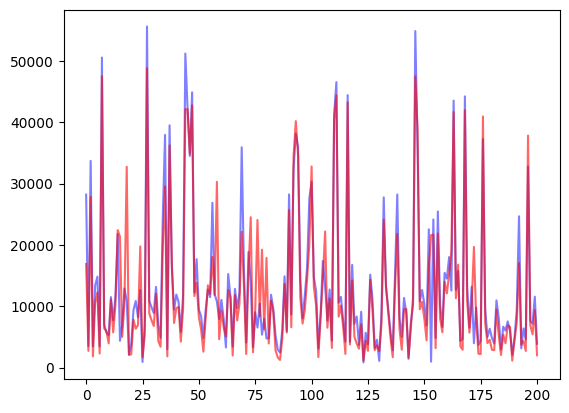

In [62]:
import matplotlib.pyplot as plt
x_idx = np.arange(len(Y_test))

plt.plot(x_idx, Y_predt, c='b', label='Actual vs. Predicted', alpha=0.5)
plt.plot(x_idx, Y_test, c='r', label='Actual vs. Predicted', alpha=0.6)

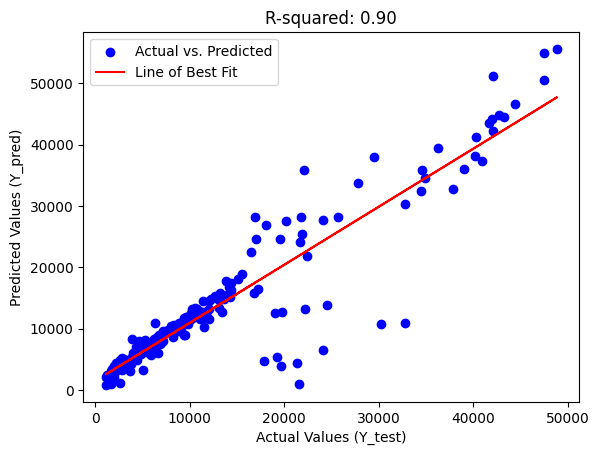

In [59]:

# Create a scatter plot of Y_test against Y_pred
plt.scatter(Y_test, Y_predt, c='b', label='Actual vs. Predicted')

# Calculate the line of best fit
coefficients = np.polyfit(Y_test.flatten(), Y_predt.flatten(), 1)
line = coefficients[0] * Y_test + coefficients[1]

# Plot the line of best fit
plt.plot(Y_test, line, 'r', label='Line of Best Fit')

# Add labels and a legend
plt.xlabel('Actual Values (Y_test)')
plt.ylabel('Predicted Values (Y_pred)')
plt.legend()

# Show the plot
plt.title(f'R-squared: {coefficients[0]**2:.2f}')
plt.show()

# Punto 2

[Implementación de la función sigmoide sin overflow](https://timvieira.github.io/blog/post/2014/02/11/exp-normalize-trick/)

In [222]:
class LogisticRegression():
  def __init__(self, lr=0.01, epochs=1000, verbose=False, l2=0):
    self.lr = lr
    self.epochs = epochs
    self.verbose=verbose
    self.l2=l2
    self.theta = None

  def sigmoid(self, x):
    return np.array([self._sigmoid_function(value) for value in x])

  def _sigmoid_function(self, x):
      if x >= 0:
          z = np.exp(-x)
          return 1 / (1 + z)
      else:
          z = np.exp(x)
          return z / (1 + z)

  def fit(self, X, y):
    n, m = X.shape
    self.theta = np.zeros(m + 1).reshape(-1,1)
    X_c = np.hstack((np.ones((n, 1)), X))
    y = y.reshape(-1,1)

    for i in range(self.epochs):
      z = np.dot(X_c, self.theta)
      a = self.sigmoid(z)
      # Esto permite que no se tengan valores nulos o 0 en el log
      a = np.clip(a, 1e-10, 1 - 1e-10)

      #Cálculo de la función de costo
      cost = (-1/n)*np.sum((y * np.log(a + 1e-9)) + ((1-y) * np.log(1 - a + 1e-9)))
      #Añade el término de regularización
      regularization_term = (self.l2 /(2*n))*np.sum(self.theta[1:]**2)
      cost += regularization_term
      #Calculo de gradient
      gradient = (np.dot(X_c.T, (a - y)) + self.l2 * self.theta) / n
      #actualización
      self.theta -= self.lr * gradient

      if self.verbose:
        print("Perdida en la época {}: {}".format(i, cost))

    print("Perdida en el conjunto de entrenamiento: {}".format(cost))
  def predict(self, X):
    X_c = np.hstack((np.ones((X.shape[0], 1)), X))
    z = np.dot(X_c, self.theta)
    a = self.sigmoid(z)
    predictions = (a >= 0.5).astype(int)
    return predictions



In [227]:
log_reg = LogisticRegression(lr=0.1, epochs=1000, verbose=False, l2=0.1)
X = train_df.drop(['smoker'], axis=1).values
Y = train_df[['smoker']].values
x_val = val_df.drop(['smoker'], axis=1).values
y_val = val_df['smoker'].values
x_test = test_df.drop(['smoker'], axis=1).values
y_test = test_df['smoker'].values

X, _,_ = standardize(X)
x_test, _,_ = standardize(x_test)
x_val,_,_ = standardize(x_val)


In [228]:
correlation_matrix = np.corrcoef(X, rowvar=False)

# Crear un DataFrame con la matriz de correlación y las etiquetas de las columnas
correlation_df = pd.DataFrame(correlation_matrix, columns=patients_df.drop(columns=['smoker']).columns,
                              index=patients_df.drop(columns=['smoker']).columns)

correlation_df

,age,sex,bmi,children,charges,region_northeast,region_northwest,region_southeast,region_southwest
age,1.000000,0.027422,0.084431,0.060771,0.285308,-0.010371,0.014073,-0.027887,0.024913
sex,0.027422,1.000000,-0.045460,-0.020528,-0.026380,0.019966,0.030021,-0.019838,-0.028997
bmi,0.084431,-0.045460,1.000000,0.029462,0.188166,-0.134960,-0.162882,0.283670,0.003014
children,0.060771,-0.020528,0.029462,1.000000,0.067443,-0.053117,0.034247,0.000312,0.018171
charges,0.285308,-0.026380,0.188166,0.067443,1.000000,0.042646,-0.050724,0.050999,-0.044196
region_northeast,-0.010371,0.019966,-0.134960,-0.053117,0.042646,1.000000,-0.316008,-0.340888,-0.323377
region_northwest,0.014073,0.030021,-0.162882,0.034247,-0.050724,-0.316008,1.000000,-0.342887,-0.325274
region_southeast,-0.027887,-0.019838,0.283670,0.000312,0.050999,-0.340888,-0.342887,1.000000,-0.350883
region_southwest,0.024913,-0.028997,0.003014,0.018171,-0.044196,-0.323377,-0.325274,-0.350883,1.000000


In [244]:
def accuracy(y_true, y_pred):
    """
    Calculo del accuracy.

    Parameters:
        y_true (numpy.ndarray): True labels (ground truth).
        y_pred (numpy.ndarray): Predicted labels.

    Returns:
        float: Accuracy.
    """
    y_true = y_true.reshape(-1,1)
    correct = np.sum(y_true == y_pred)
    total = len(y_true)
    accuracy = correct / total
    return accuracy

def r2_score(y_true, y_pred):
    y_true = y_true.reshape(-1,1)
    y_pred = y_pred.reshape(-1,1)
    # Calcular la suma de los cuadrados totales (SST)
    mean_y_true = np.mean(y_true)
    sst = np.sum((y_true - mean_y_true) ** 2)

    # Calcular la suma de los cuadrados de la regresión (SSR)
    ssr = np.sum((y_pred - mean_y_true) ** 2)

    # Calcular el R²
    r2 = ssr / sst

    return r2
def confusion_matrix(y_true, y_pred):
    # Calcular el número de clases

    num_classes = len(np.unique(y_true))

    # Crear una matriz de confusión inicializada con ceros
    conf_matrix = np.zeros((num_classes, num_classes), dtype=int)

    # Llenar la matriz de confusión
    for i in range(len(y_true)):
        true_class = y_true[i]
        pred_class = y_pred[i]
        conf_matrix[true_class][pred_class] += 1

    return conf_matrix

def f1_score(y_true, y_pred):
    # Calcular la matriz de confusión
    conf_matrix = confusion_matrix(y_true, y_pred)

    # Calcular la precisión y el rcall para cada clase
    precision = np.zeros(len(conf_matrix))
    recall = np.zeros(len(conf_matrix))
    f1 = np.zeros(len(conf_matrix))

    for i in range(len(conf_matrix)):
        true_positive = conf_matrix[i, i]
        false_positive = sum(conf_matrix[:, i]) - true_positive
        false_negative = sum(conf_matrix[i, :]) - true_positive

        precision[i] = true_positive / (true_positive + false_positive)
        recall[i] = true_positive / (true_positive + false_negative)

        # Calcular el puntaje F1
        f1[i] = 2 * (precision[i] * recall[i]) / (precision[i] + recall[i])

    # Calcular el puntaje F1 promedio
    f1_avg = np.mean(f1)

    return f1_avg

In [245]:
def evaluate_hyperparameters(X_train, y_train, X_val, y_val, learning_rates, epochs_list, l2_list):
    best_f1_score = -float('inf')
    best_hyperparameters = None

    for lr in learning_rates:
        for epochs in epochs_list:
            for l2 in l2_list:
                model = LogisticRegression(lr=lr, epochs=epochs, l2=l2)
                print("Entrenando con los siguientes hiperparametros: LR {}, epochs: {}, lambda: {}".format(lr, epochs, l2))
                model.fit(X_train, y_train)
                predictions = model.predict(X_val)
                f1 = f1_score(y_val, predictions)
                if f1 > best_f1_score:
                    best_f1_score = f1
                    best_hyperparameters = (lr, epochs, l2)

    return best_hyperparameters, best_f1_score

learning_rates = [0.001, 0.01, 0.1]
epochs_list = [500, 1000, 100]
l2_list = [0, 0.01, 0.1]
best_hyperparameters, best_f1_score = evaluate_hyperparameters(X, Y, x_val, y_val, learning_rates, epochs_list, l2_list)
print("Mejores hiperparámetros:", best_hyperparameters)
print("Mejor F1 en validación:", best_f1_score)

Entrenando con los siguientes hiperparametros: LR 0.001, epochs: 500, lambda: 0
Perdida en el conjunto de entrenamiento: 0.6089128190812316
Entrenando con los siguientes hiperparametros: LR 0.001, epochs: 500, lambda: 0.01
Perdida en el conjunto de entrenamiento: 0.6089131488955326
Entrenando con los siguientes hiperparametros: LR 0.001, epochs: 500, lambda: 0.1
Perdida en el conjunto de entrenamiento: 0.6089161171368256
Entrenando con los siguientes hiperparametros: LR 0.001, epochs: 1000, lambda: 0
Perdida en el conjunto de entrenamiento: 0.5426294853089997
Entrenando con los siguientes hiperparametros: LR 0.001, epochs: 1000, lambda: 0.01
Perdida en el conjunto de entrenamiento: 0.5426306064637529
Entrenando con los siguientes hiperparametros: LR 0.001, epochs: 1000, lambda: 0.1
Perdida en el conjunto de entrenamiento: 0.5426406962767434
Entrenando con los siguientes hiperparametros: LR 0.001, epochs: 100, lambda: 0
Perdida en el conjunto de entrenamiento: 0.6747403834564752
Entrena

In [246]:
best_model = LogisticRegression(lr=0.1, epochs=1000)
best_model.fit(X, Y)


Perdida en el conjunto de entrenamiento: 0.1157264674675361


In [247]:
predictions = best_model.predict(x_test)
acc = accuracy(y_test, predictions)
f1 = f1_score(y_test, predictions)
confusion_m = confusion_matrix(y_test, predictions)

print("Accuracy: ", acc)
print("R2 score: ", f1)

Accuracy:  0.9701492537313433
R2 score:  0.9548517520215634


In [248]:
confusion_m

array([[156,   6],
       [  0,  39]])